In [4]:
from functools import partial
import numpy as np
from math import sqrt, log, pi, exp
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm

In [5]:
FACTOR_LOGNORMAL = 1.0 / ( sqrt(2.0*pi))

def lognormal(r, ksi=1.0, lambda_=1.0):
    
    par1 = FACTOR_LOGNORMAL/(ksi*r)
    par2 = -0.5*((log(r) - lambda_)/ksi)**2     
    
    return  par1 * exp(par2)

def sigma(mu, delta):
    return mu * delta

def ksi(delta):
    return sqrt(log(1.0+delta**2))

def lambda_(mu, ksi):
    return  log(mu) - 0.5 * ksi**2


def paramenters_lognormal(mu, delta):
    k = ksi(delta)    
    return sigma(mu, delta), k, lambda_(mu, k)


In [6]:
def tipoI(x, alpha, u):
    par1 = exp(-alpha * (x - u))
    return alpha*exp(-par1)*par1


def alpha(sig):
    return (pi/sqrt(6))*(1.0/sig)

def u(mu, alpha):
    return mu - 0.5772/alpha

# U1 - Modulo de Elasticidade do Cimento: LogNormal

In [7]:
mu1, delta1 = 1.19, 0.1

sigma1, ksi1, lambda1 =  paramenters_lognormal(mu1, delta1)

print(f'sigma = {sigma1:.3f} ksi = {ksi1:.5f} lambda = {lambda1:.5f}')

sigma = 0.119 ksi = 0.09975 lambda = 0.16898


In [8]:
x = np.arange(0.01, mu1+10*sigma1, 0.01)
p = np.arange(0.0, 1.0, 0.001)

# 
# scale = exp μ, where μ is the mean of the log of the variate
# s = the standard deviation of the log of the variate

f1 = partial(lognorm.pdf, s=ksi1, scale=exp(lambda1))
F1 = partial(lognorm.cdf, s=ksi1, scale=exp(lambda1))
IF1 = partial(lognorm.ppf, s=ksi1, scale=exp(lambda1))

pdf = f1(x)
cdf = F1(x)
icdf = IF1(p)

In [9]:
def graph_pdf(x, pdf, mu, xlabel, ylabel):
    
    plt.figure(figsize=(8, 4))

    plt.plot(x, pdf, label='dist')
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.axvline(x = mu, color = 'r', label = 'Media')

    plt.legend()

    plt.show()
    

def graph_cdf(x, cdf, mu, xlabel, ylabel):

    plt.figure(figsize=(8, 4))
    
    plt.plot(x, cdf, label='dist')
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.axvline(x = mu, color = 'r', label = 'Media')

    plt.legend()

    plt.show()
    
def graph_icdf(x, icdf, mu, xlabel, ylabel):
    plt.figure(figsize=(8, 4))
    plt.plot(p, icdf, label='Função inversa Acumulada')
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.axhline(y = mu, color = 'r', label = 'Media')

    plt.legend()

    plt.show()

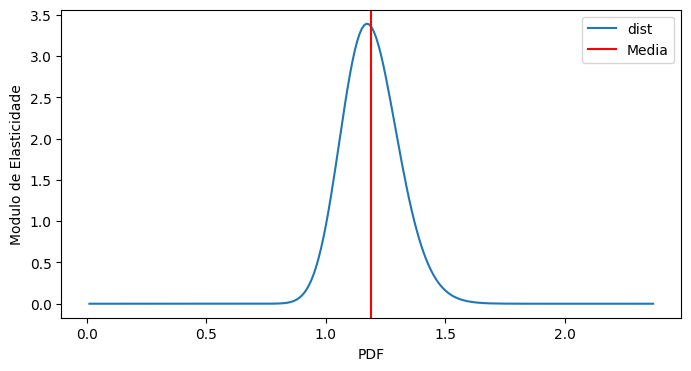

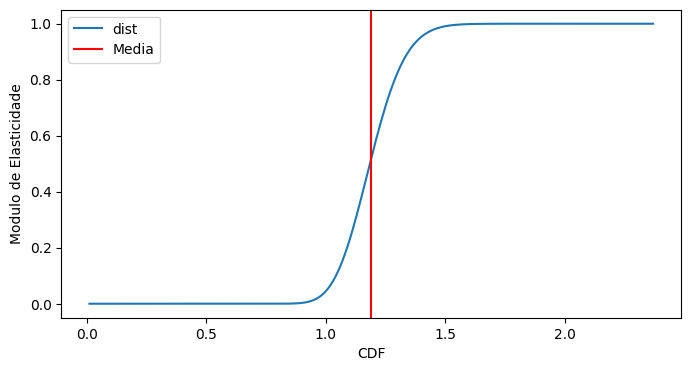

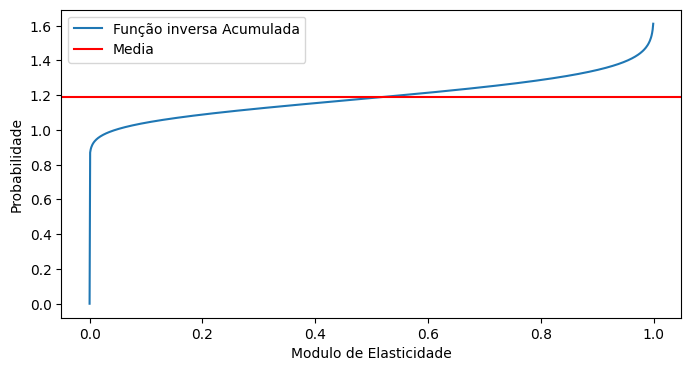

In [10]:
graph_pdf(x, pdf, mu1, 'Modulo de Elasticidade', 'PDF')
graph_cdf(x, cdf, mu1, 'Modulo de Elasticidade', 'CDF')
graph_icdf(x, icdf, mu1, 'Probabilidade', 'Modulo de Elasticidade')

# U2 - Coeficiente de Poisson do Cimento: LogNormal

In [11]:
mu2, delta2 = 1.8, 0.1

sigma2, ksi2, lambda2 =  paramenters_lognormal(mu2, delta2)

print(f'sigma = {sigma2:.3f} ksi = {ksi2:.5f} lambda = {lambda2:.5f}')

sigma = 0.180 ksi = 0.09975 lambda = 0.58281


In [12]:
x = np.arange(0.01, mu2+10*sigma2, 0.01)
p = np.arange(0.0, 1.0, 0.001)

# 
# scale = exp μ, where μ is the mean of the log of the variate
# s = the standard deviation of the log of the variate

f2 = partial(lognorm.pdf, s=ksi2, scale=exp(lambda2))
F2 = partial(lognorm.cdf, s=ksi2, scale=exp(lambda2))
IF2 = partial(lognorm.ppf, s=ksi2, scale=exp(lambda2))

pdf = f2(x)
cdf = F2(x)
icdf = IF2(p)

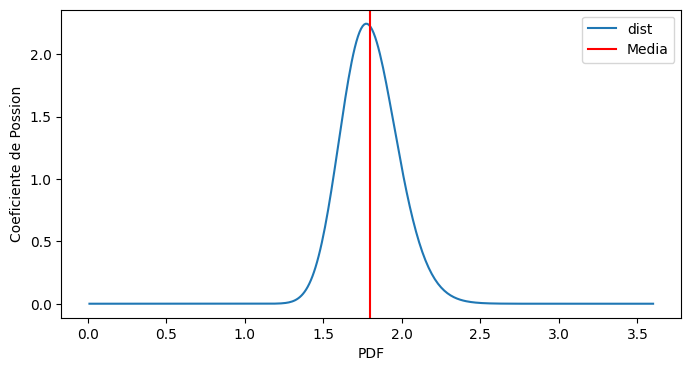

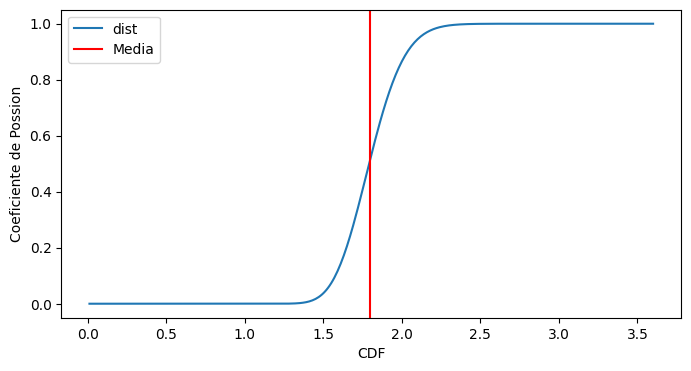

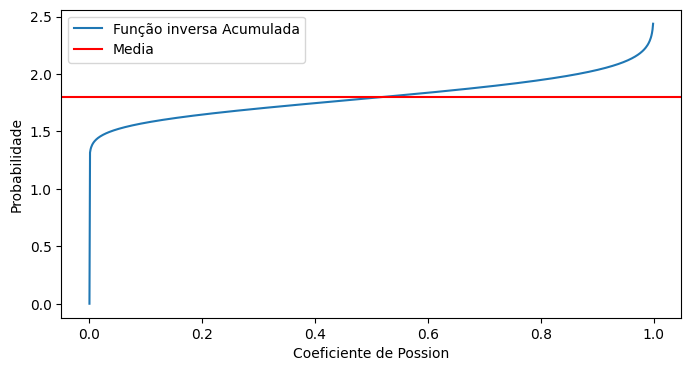

In [13]:
graph_pdf(x, pdf, mu2, 'Coeficiente de Possion', 'PDF')
graph_cdf(x, cdf, mu2, 'Coeficiente de Possion', 'CDF')
graph_icdf(x, icdf, mu2, 'Probabilidade', 'Coeficiente de Possion')

# U3 - Coesão: Normal

In [14]:
mu3, delta3 = 1.97, 0.1

sigma3 = sigma(mu3, delta3)

print(f'sigma = {sigma3:.3f}')

sigma = 0.197


In [15]:
f3 = partial(norm.pdf, loc=mu3, scale=sigma3)
F3 = partial(norm.cdf, loc=mu3, scale=sigma3)
IF3 = partial(norm.ppf, loc=mu3, scale=sigma3)

x = np.arange(0.01, mu3+10*sigma3, 0.01)
p = np.arange(0.0, 1.0, 0.001)

pdf = f3(x)
cdf = F3(x)
icdf = IF3(p)

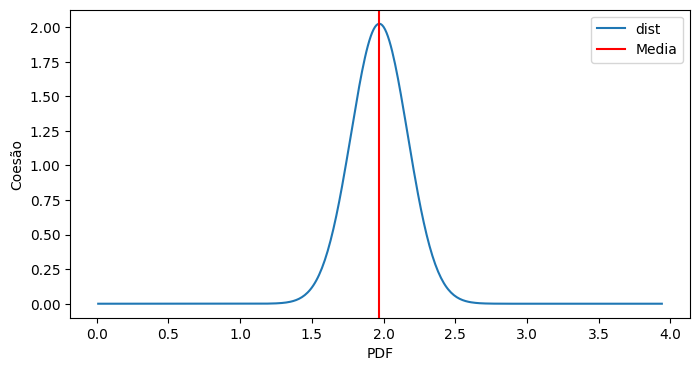

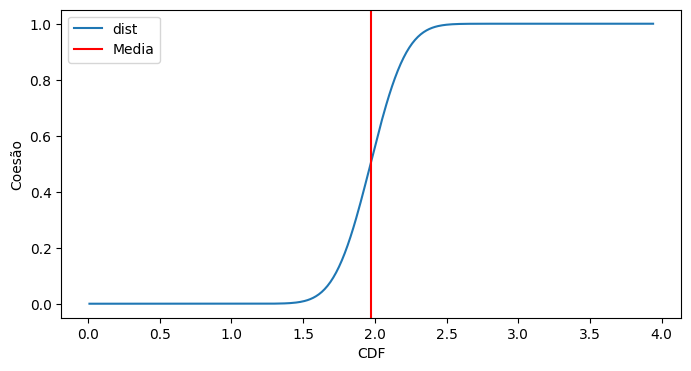

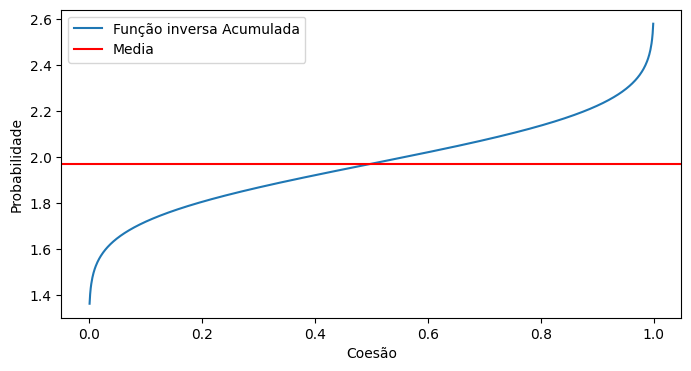

In [16]:
graph_pdf(x, pdf, mu3, 'Coesão', 'PDF')
graph_cdf(x, cdf, mu3, 'Coesão', 'CDF')
graph_icdf(x, icdf, mu3, 'Probabilidade', 'Coesão')

# U4 - Pressão interna: Tipo I

In [17]:
mu4, delta4 = 1.0, 0.1

sigma4 = sigma(mu4, delta4)

alpha4 = alpha(sigma4)

uu4 = u(mu4, alpha4)
    
print(f'sigma = {sigma4:.3f} alpha = {alpha4:.3f} u = {uu4:.3f}')    

sigma = 0.100 alpha = 12.825 u = 0.955


In [18]:
def tipoI(x, alpha, u):
    par1 = exp(-alpha * (x - u))
    return alpha*exp(-par1)*par1

def ctipoI(x, alpha, u):
    par1 = exp(-alpha * (x - u))
    return exp(-par1)


def ictipoI(p, alpha, u):
    par1 = -log(-log(p))
    return par1 / alpha + u

def alpha(sig):
    return (pi/sqrt(6))*(1.0/sig)

def u(mu, alpha):
    return mu - 0.5772/alpha


f4 = partial(tipoI, alpha=alpha4, u=uu4)
F4 = partial(ctipoI, alpha=alpha4, u=uu4)
IF4 = partial(ictipoI, alpha=alpha4, u=uu4)

x = np.arange(0.01, mu4+10*sigma4, 0.01)
p = np.arange(0.0001, 1.0, 0.001)

pdf = [f4(xi) for xi in x]
cdf = [F4(xi) for xi in x]
icdf = [IF4(pi) for pi in p]


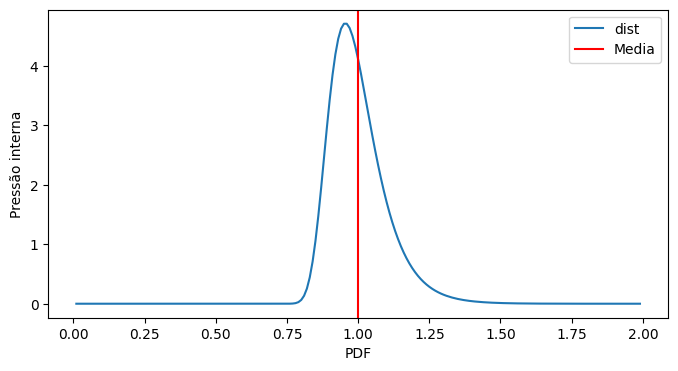

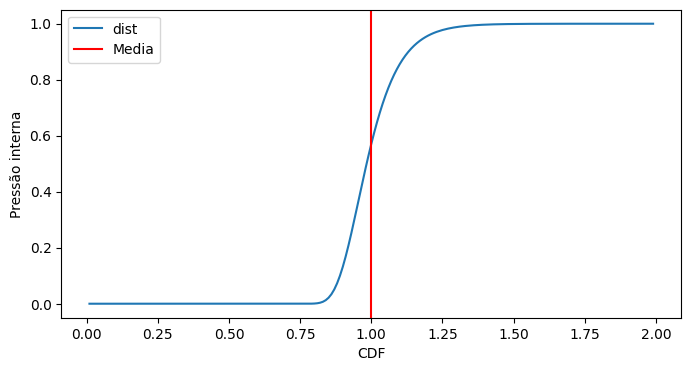

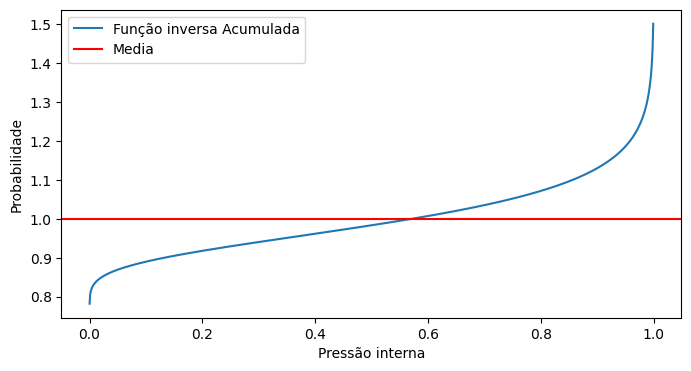

In [19]:
graph_pdf(x, pdf, mu4, 'Pressão interna', 'PDF')
graph_cdf(x, cdf, mu4, 'Pressão interna', 'CDF')
graph_icdf(x, icdf, mu4, 'Probabilidade', 'Pressão interna')

# U5 - Temperatura Interna: Normal

In [20]:
mu5, delta5 = 1.0, 0.1

sigma5 = sigma(mu5, delta5)

print(f'sigma = {sigma5:.3f}')

sigma = 0.100


In [21]:
f5 = partial(norm.pdf, loc=mu5, scale=sigma5)
F5 = partial(norm.cdf, loc=mu5, scale=sigma5)
IF5 = partial(norm.ppf, loc=mu5, scale=sigma5)

x = np.arange(0.01, mu5+10*sigma5, 0.01)
p = np.arange(0.0, 1.0, 0.001)

pdf = f5(x)
cdf = F5(x)
icdf = IF5(p)

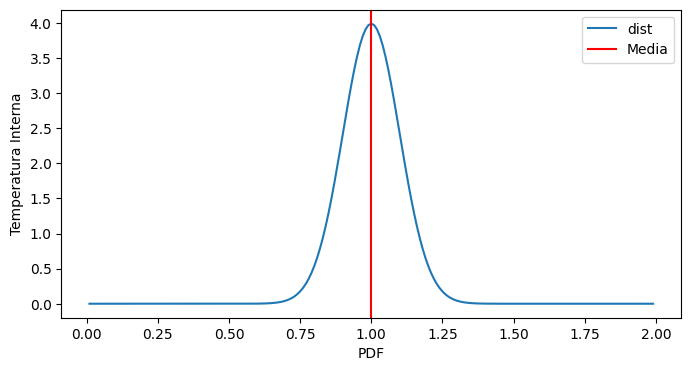

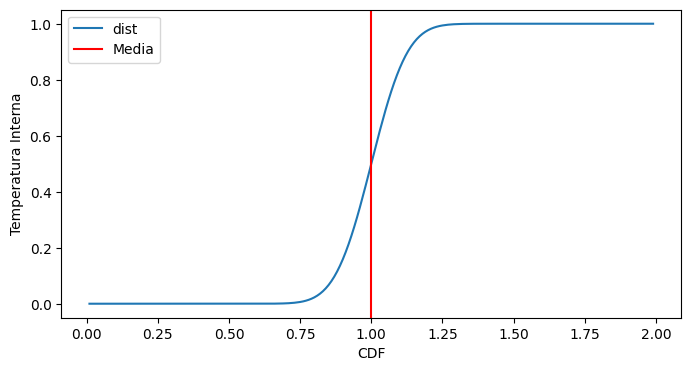

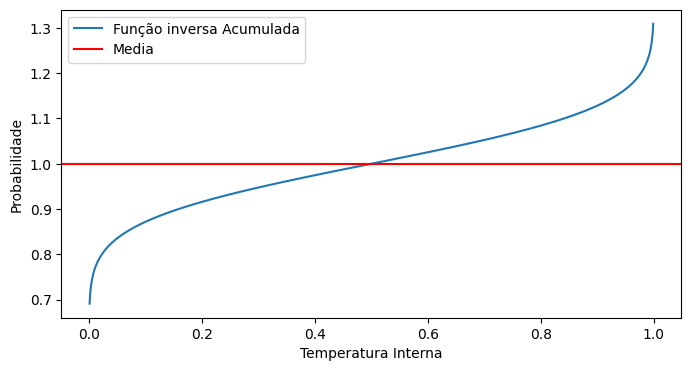

In [22]:
graph_pdf(x, pdf, mu5, 'Temperatura Interna', 'PDF')
graph_cdf(x, cdf, mu5, 'Temperatura Interna', 'CDF')
graph_icdf(x, icdf, mu5, 'Probabilidade', 'Temperatura Interna')

 # U6 - Ângulo de atrito interno: Lognormal

In [23]:
mu6, delta6 = 9.2, 0.1

sigma6, ksi6, lambda6 =  paramenters_lognormal(mu6, delta6)

print(f'sigma = {sigma6:.3f} ksi = {ksi6:.5f} lambda = {lambda6:.5f}')

sigma = 0.920 ksi = 0.09975 lambda = 2.21423


In [24]:
x = np.arange(0.01, mu6+10*sigma6, 0.01)
p = np.arange(0.0, 1.0, 0.001)

f6 = partial(lognorm.pdf, s=ksi6, scale=exp(lambda6))
F6 = partial(lognorm.cdf, s=ksi6, scale=exp(lambda6))
IF6 = partial(lognorm.ppf, s=ksi6, scale=exp(lambda6))

pdf = f6(x)
cdf = F6(x)
icdf = IF6(p)

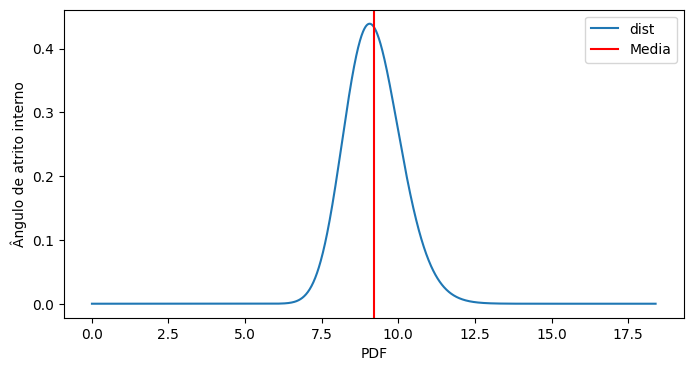

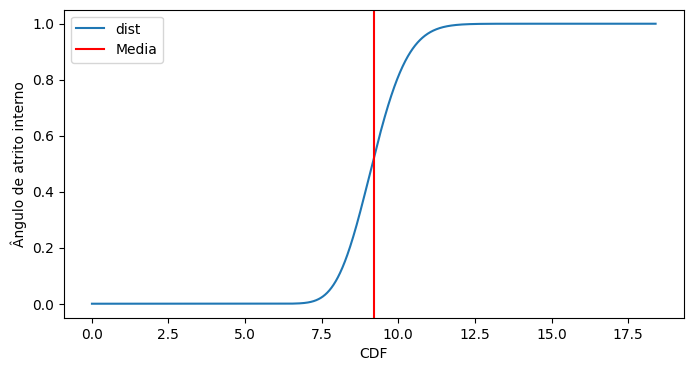

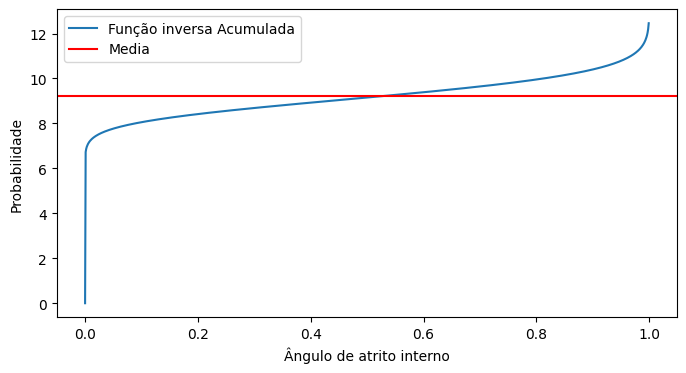

In [25]:
graph_pdf(x, pdf, mu6, 'Ângulo de atrito interno', 'PDF')
graph_cdf(x, cdf, mu6, 'Ângulo de atrito interno', 'CDF')
graph_icdf(x, icdf, mu6, 'Probabilidade', 'Ângulo de atrito interno')

# U7 - Coef. de Dilatação Térmica: Lognormal

In [26]:
mu7, delta7 = 6.4, 0.1

sigma7, ksi7, lambda7 =  paramenters_lognormal(mu7, delta7)

print(f'sigma = {sigma7:e} ksi = {ksi7:.5f} lambda = {lambda7:.5f}')

sigma = 6.400000e-01 ksi = 0.09975 lambda = 1.85132


In [27]:
x = np.arange(1e-9, mu7+10*sigma7, 0.01)
p = np.arange(0.0, 1.0, 0.001)

f7 = partial(lognorm.pdf, s=ksi7, scale=exp(lambda7))
F7 = partial(lognorm.cdf, s=ksi7, scale=exp(lambda7))
IF7 = partial(lognorm.ppf, s=ksi7, scale=exp(lambda7))

pdf = f7(x)
cdf = F7(x)
icdf = IF7(p)

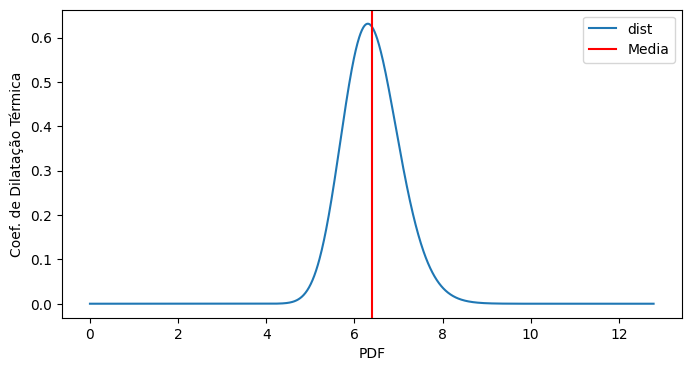

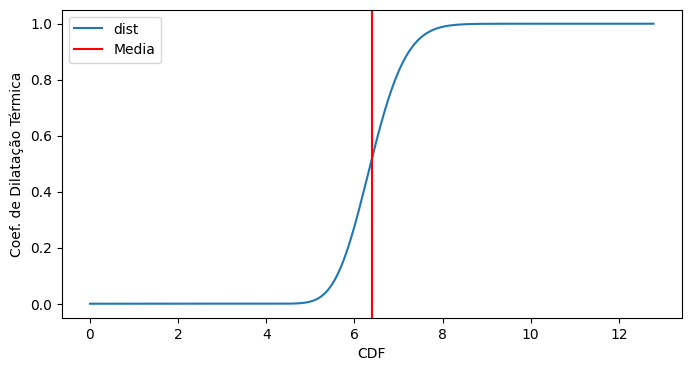

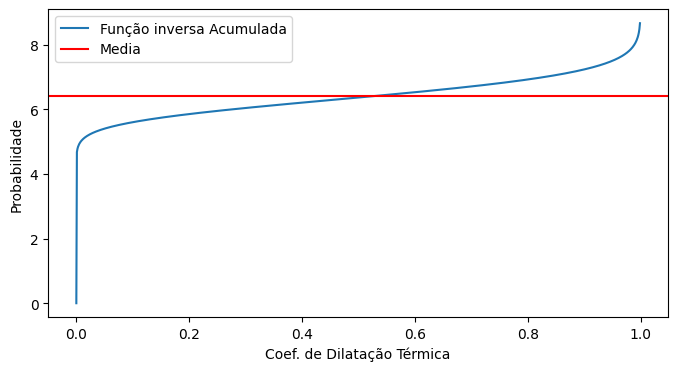

In [28]:
graph_pdf(x, pdf, mu7, 'Coef. de Dilatação Térmica', 'PDF')
graph_cdf(x, cdf, mu7, 'Coef. de Dilatação Térmica', 'CDF')
graph_icdf(x, icdf, mu7, 'Probabilidade', 'Coef. de Dilatação Térmica')

# FORMS LOOP

In [29]:
def print_array(name, array):
    print(name, end=' ')
    for a in array:
        print(f'{a:.3e}', end=' ')
    print()
        
def array_V(Ua, list_of_F):
    cholesky = np.ones_like(Ua) 
    
    vector = np.zeros_like(Ua)
    for i, (u, F) in enumerate(zip(Ua, list_of_F)):
        vector[i] = norm.ppf(F(u))    
        
    return cholesky * vector


def array_Y(Va):
    
    cholesky = np.ones_like(Va)      
        
    return cholesky * Va


def array_U(Vn, IFs):
    
    Y =  array_Y(Vn)
    
    vector = np.zeros_like(Y)
    
    for i, (y, IF) in enumerate(zip(Y, IFs)):
        vector[i] = IF(norm.cdf(y))

    return vector

def matrix_A(Ua, fs, Fs):
    
    A = np.zeros_like(Ua)
    
    for i, (U, f, F) in enumerate(zip(Ua, fs, Fs)):
        A[i]= f(U) / norm.pdf(norm.ppf(F(U)))  
    
    return A
    
    
def i_matrix_A(A):
    return 1.0/A

In [30]:
fs = (f1, f2, f3, f6, f7)
Fs = (F1, F2, F3, F6, F7)
IFs = (IF1, IF2, IF3, IF6, IF7)

## Iteração: 01

In [31]:
Ua = np.array([1.19, 1.8, 1.97, 9.2, 6.4])
beta = 20
delta = 0.01
gamma = 0.3

# RCs
RC = 68.41e-2
novos_rcs =  np.array([67.98e-2, 68.3e-2, 68.70e-2, 68.44e-2, 68.42e-2])

Uaux = Ua*(1+delta)

Gi = RC - gamma
Gaux = novos_rcs - gamma

print('Gi', Gi)
print_array('Uaux', Uaux)
print_array('Gaux', Gaux)

Gi 0.38410000000000005
Uaux 1.202e+00 1.818e+00 1.990e+00 9.292e+00 6.464e+00 
Gaux 3.798e-01 3.830e-01 3.870e-01 3.844e-01 3.842e-01 


In [32]:
GradU = (Gaux - Gi)/(Ua*delta)

Vi = array_V(Ua, Fs)

A = matrix_A(Ua, fs, Fs)
iA = i_matrix_A(A)
Grad_gi = iA * GradU

Modg = np.linalg.norm(Grad_gi, ord=2)

Modg_square = Modg**2
Vn = ((np.dot(Grad_gi, Vi) - Gi) * Grad_gi) / Modg_square
betai = np.linalg.norm(Vn)

tol = abs(betai - beta) / betai

Un = array_U(Vn, IFs)

print_array('GradU', GradU)
print_array('Vi', Vi)
print_array('A', A)
print_array('iA', iA)
print_array('Grad_gi', Grad_gi)
print(f'Modg = |Grad_gi| = {Modg}')
print_array('Vn', Vn)
print(f'betai = |Vn| = {betai:.3e}')
print(f'tol = {tol:.3e}')  
print_array('Un', Un) 

GradU -3.613e-01 -6.111e-02 1.472e-01 3.261e-03 1.562e-03 
Vi 4.988e-02 4.988e-02 0.000e+00 4.988e-02 4.988e-02 
A 8.424e+00 5.569e+00 5.076e+00 1.090e+00 1.566e+00 
iA 1.187e-01 1.796e-01 1.970e-01 9.177e-01 6.384e-01 
Grad_gi -4.289e-02 -1.097e-02 2.900e-02 2.993e-03 9.975e-04 
Modg = |Grad_gi| = 0.05302042539368536
Vn 5.899e+00 1.509e+00 -3.988e+00 -4.115e-01 -1.372e-01 
betai = |Vn| = 7.291e+00
tol = 1.743e+00
Un 2.133e+00 2.082e+00 1.184e+00 8.786e+00 6.282e+00 


# Iteração 02:

In [33]:
Ua = np.array(Un)
beta = betai

# RCs
rc = -1.71e-2
novos_rcs =  np.array([-2.72e-2, -2e-2, -0.93e-2, -1.49e-2, -1.7e-2])

Uaux = Ua*(1+delta)

Gi = rc - gamma
Gaux = novos_rcs - gamma

print_array('Ua', Ua)
print_array('Uaux', Uaux)
print_array('Gaux', Gaux)

Ua 2.133e+00 2.082e+00 1.184e+00 8.786e+00 6.282e+00 
Uaux 2.154e+00 2.103e+00 1.196e+00 8.874e+00 6.345e+00 
Gaux -3.272e-01 -3.200e-01 -3.093e-01 -3.149e-01 -3.170e-01 


In [34]:
GradU = (Gaux - Gi)/(Ua*delta)

Vi = array_V(Ua, Fs)

A = matrix_A(Ua, fs, Fs)
iA = i_matrix_A(A)
Grad_gi = iA * GradU

Modg = np.linalg.norm(Grad_gi, ord=2)

Modg_square = Modg**2
Vn = ((np.dot(Grad_gi, Vi) - Gi) * Grad_gi) / Modg_square
betai = np.linalg.norm(Vn)

tol = abs(betai - beta) / betai

Un = array_U(Vn, IFs)

print_array('GradU', GradU)
print_array('Vi', Vi)
print_array('A', A)
print_array('iA', A)
print_array('Grad_gi', Grad_gi)
print(f'Modg = |Grad_gi| = {Modg}')
print_array('Vn', Vn)
print(f'betai = |Vn| = {betai:.3e}')
print(f'tol = {tol:.3e}')  
print_array('Un', Un) 

GradU -4.736e-01 -1.393e-01 6.586e-01 2.504e-02 1.592e-03 
Vi 5.899e+00 1.509e+00 -3.988e+00 -4.115e-01 -1.372e-01 
A 4.701e+00 4.815e+00 5.076e+00 1.141e+00 1.596e+00 
iA 4.701e+00 4.815e+00 5.076e+00 1.141e+00 1.596e+00 
Grad_gi -1.007e-01 -2.893e-02 1.297e-01 2.195e-02 9.975e-04 
Modg = |Grad_gi| = 0.1682336810322882
Vn 3.017e+00 8.661e-01 -3.885e+00 -6.571e-01 -2.987e-02 
betai = |Vn| = 5.037e+00
tol = 4.475e-01
Un 1.600e+00 1.953e+00 1.205e+00 8.574e+00 6.349e+00 


# Iteração 03:

In [35]:
Ua = np.array(Un)
beta = betai

# RCs
rc = 27.67e-2
novos_rcs =  np.array([26.83e-2, 27.44e-2, 28.25e-2, 27.79e-2, 27.68e-2])

Uaux = Ua*(1+delta)

Gi = rc - gamma
Gaux = novos_rcs - gamma

print_array('Ua', Ua)
print_array('Uaux', Uaux)
print_array('Gaux', Gaux)

Ua 1.600e+00 1.953e+00 1.205e+00 8.574e+00 6.349e+00 
Uaux 1.616e+00 1.972e+00 1.217e+00 8.659e+00 6.413e+00 
Gaux -3.170e-02 -2.560e-02 -1.750e-02 -2.210e-02 -2.320e-02 


In [36]:
GradU = (Gaux - Gi)/(Ua*delta)

Vi = array_V(Ua, Fs)

A = matrix_A(Ua, fs, Fs)
iA = i_matrix_A(A)
Grad_gi = iA * GradU

Modg = np.linalg.norm(Grad_gi, ord=2)

Modg_square = Modg**2
Vn = ((np.dot(Grad_gi, Vi) - Gi) * Grad_gi) / Modg_square
betai = np.linalg.norm(Vn)

tol = abs(betai - beta) / betai

Un = array_U(Vn, IFs)

print_array('GradU', GradU)
print_array('Vi', Vi)
print_array('A', A)
print_array('iA', A)
print_array('Grad_gi', Grad_gi)
print(f'Modg = |Grad_gi| = {Modg}')
print_array('Vn', Vn)
print(f'betai = |Vn| = {betai:.3e}')
print(f'tol = {tol:.3e}') 
print_array('Un', Un) 

GradU -5.251e-01 -1.178e-01 4.814e-01 1.400e-02 1.575e-03 
Vi 3.017e+00 8.661e-01 -3.885e+00 -6.571e-01 -2.987e-02 
A 6.266e+00 5.134e+00 5.076e+00 1.169e+00 1.579e+00 
iA 6.266e+00 5.134e+00 5.076e+00 1.169e+00 1.579e+00 
Grad_gi -8.379e-02 -2.294e-02 9.484e-02 1.197e-02 9.975e-04 
Modg = |Grad_gi| = 0.12917699913681338
Vn 3.142e+00 8.602e-01 -3.556e+00 -4.488e-01 -3.740e-02 
betai = |Vn| = 4.843e+00
tol = 4.000e-02
Un 1.620e+00 1.952e+00 1.269e+00 8.754e+00 6.345e+00 


# Iteração 04:

In [37]:
Ua = np.array(Un)
beta = betai

# RCs
rc = 29.92e-2
novos_rcs =  np.array([29.12e-2, 29.71e-2, 30.5e-2, 30.04e-2, 29.93e-2])

Uaux = Ua*(1+delta)

Gi = rc - gamma
Gaux = novos_rcs - gamma

print_array('Ua', Ua)
print_array('Uaux', Uaux)
print_array('Gaux', Gaux)

Ua 1.620e+00 1.952e+00 1.269e+00 8.754e+00 6.345e+00 
Uaux 1.636e+00 1.971e+00 1.282e+00 8.841e+00 6.408e+00 
Gaux -8.800e-03 -2.900e-03 5.000e-03 4.000e-04 -7.000e-04 


In [38]:
GradU = (Gaux - Gi)/(Ua*delta)

Vi = array_V(Ua, Fs)

A = matrix_A(Ua, fs, Fs)
iA = i_matrix_A(A)
Grad_gi = iA * GradU

Modg = np.linalg.norm(Grad_gi, ord=2)

Modg_square = Modg**2
Vn = ((np.dot(Grad_gi, Vi) - Gi) * Grad_gi) / Modg_square
betai = np.linalg.norm(Vn)

tol = abs(betai - beta) / betai

Un = array_U(Vn, IFs)

print_array('GradU', GradU)
print_array('Vi', Vi)
print_array('A', A)
print_array('iA', A)
print_array('Grad_gi', Grad_gi)
print(f'Modg = |Grad_gi| = {Modg}')
print_array('Vn', Vn)
print(f'betai = |Vn| = {betai:.3e}')
print(f'tol = {tol:.3e}') 
print_array('Un', Un) 

GradU -4.939e-01 -1.076e-01 4.569e-01 1.371e-02 1.576e-03 
Vi 3.142e+00 8.602e-01 -3.556e+00 -4.488e-01 -3.740e-02 
A 6.189e+00 5.137e+00 5.076e+00 1.145e+00 1.580e+00 
iA 6.189e+00 5.137e+00 5.076e+00 1.145e+00 1.580e+00 
Grad_gi -7.980e-02 -2.095e-02 9.001e-02 1.197e-02 9.975e-04 
Modg = |Grad_gi| = 0.12268843631219958
Vn 3.146e+00 8.258e-01 -3.548e+00 -4.719e-01 -3.932e-02 
betai = |Vn| = 4.837e+00
tol = 1.386e-03
Un 1.621e+00 1.945e+00 1.271e+00 8.733e+00 6.343e+00 


# Resultado Final

In [42]:
beta_FORM = betai
Pf_FORM = norm.cdf(-betai)
alpha_FORM = Grad_gi / Modg


beta_FORM, Pf_FORM, alpha_FORM 

print(f'betaFORM = {beta_FORM:.4f} PfFORM = {Pf_FORM:.4e}')

betaFORM = 4.8366 PfFORM = 6.6024e-07


In [43]:
alpha_FORM

array([-0.65043682, -0.17073966,  0.7336176 ,  0.09756552,  0.00813046])

## Fatores de importância

In [40]:
print('Fatores de importancias:')
for i, alf in enumerate(alpha_FORM):
    print(f'u_{i} = {100.0*alf**2:.4f} %')

Fatores de importancias:
u_0 = 42.3068 %
u_1 = 2.9152 %
u_2 = 53.8195 %
u_3 = 0.9519 %
u_4 = 0.0066 %


## Fatores de Omissão

In [41]:
print('Fatores de omisao:')
for i, alf in enumerate(alpha_FORM):
    gamma = 1.0 / sqrt(1 - alf**2)
    print(f'u_{i} = {gamma:.4f}')

Fatores de omisao:
u_0 = 1.3166
u_1 = 1.0149
u_2 = 1.4715
u_3 = 1.0048
u_4 = 1.0000


In [47]:
1.0 / sqrt(1 - alpha_FORM**2)

TypeError: only size-1 arrays can be converted to Python scalars